In [1]:
# Running on 'collect' env
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import scipy

from scipy.io import loadmat

from itertools import permutations

In [2]:
sp = 'C:\\Users\\roberttk\\Desktop\\SLAC_RA\\RL_AdaptiveIllumination\\RL_AI_code\\spectra'
sl = list(Path(sp).glob('*.mat'))

x1 = loadmat(sl[0])
data = x1['Fe_normMaster1']

x2 = loadmat(sl[1])
data2 = x2['Fe_XANES2']
print(np.shape(data))

(230, 118)


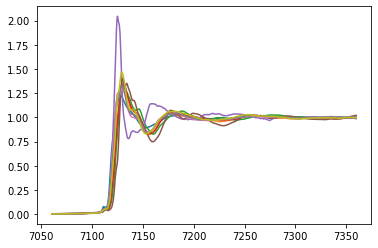

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for i in range(1,10):
    ax.plot(data[:, 0], data[:, i])

Y     X
0  9.0 -31.5
1  4.5 -31.5
2  0.0 -31.5
3 -4.5 -31.5
4 -9.0 -31.5
1073.25


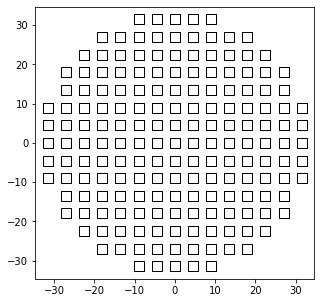

In [4]:
path177 = Path.cwd() / 'positions' / '177.csv'
locdf = pd.read_csv(path177)
locdf = locdf.rename(columns={'Plate Y': 'Y', 'Plate X': 'X'})
print(locdf.head())

locdf['rad'] = locdf['X']**2 + locdf['Y']**2
print(np.max(locdf['rad']))
plt.figure(figsize=(5,5))
plt.scatter(locdf['X'], locdf['Y'], marker='s', facecolors='none', edgecolors='k', s=100)

In [75]:
def gen_wafer_locs(shape='circle', radius=32):
    """
    Create square grid of locations, with spacing of 1 between
    return x, y arrays of locations
    """
    vals = np.arange(-int(radius), int(radius)+1, 1)

    xv, yv = np.meshgrid(vals, vals)

    x = xv.flatten()
    y = yv.flatten()

    xout = [] #np.array([])
    yout = [] # np.array([])
    for i in range(len(x)):
        if (x[i]**2 + y[i]**2) <= radius**2:
            xout.append(x[i])
            yout.append(y[i])

    return xout, yout

177


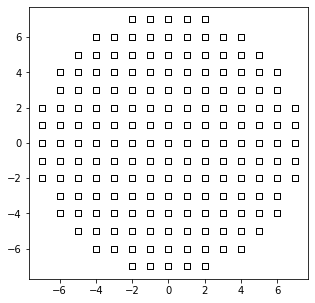

In [77]:
x, y = gen_wafer_locs(radius=7.5)
print(len(x))
locdf = pd.DataFrame({'X': x, 'Y': y})

plt.figure(figsize=(5,5))
plt.scatter(locdf['X'], locdf['Y'], marker='s', facecolors='none', edgecolors='k')


In [ ]:
def gen_vornoi_classes(x, y, n_classes):
    """
    target is the series to fill values into.  Should be initialized
    """
    vpoints = []
    classes = np.zeros(len(x))
    for i in range(n_classes):
        vpoints.append( np.random.randint(0, len(x)) )

    print(vpoints)
    for i in range(len(x)):
        dists = [np.sqrt( (xx-x[i])**2 + (yy-y[i])**2 ) for xx, yy in zip(x[vpoints], y[vpoints])]

        classes[i] = np.argmin(dists)# point it is closest to floored

    return classes, vpoints

[131, 112, 129, 37, 13, 109]


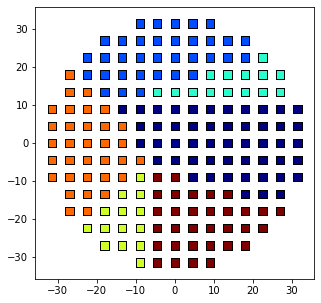

In [37]:
locdf.head()

classes, points = gen_vornoi_classes(locdf['X'], locdf['Y'], 6)
locdf['class'] = classes

plt.figure(figsize=(5,5))

plt.scatter(locdf['X'], locdf['Y'], marker='s', facecolors='none', edgecolors='k', s=100)
plt.scatter(locdf['X'], locdf['Y'], c=locdf['class'], cmap=cm.jet,
            marker='s', edgecolors='k', s=100)

In [38]:
locdf

,Y,X,class
0,9.0,-31.5,4.0
1,4.5,-31.5,4.0
2,0.0,-31.5,4.0
3,-4.5,-31.5,4.0
4,-9.0,-31.5,4.0
...,...,...,...
172,9.0,31.5,0.0
173,4.5,31.5,0.0
174,0.0,31.5,0.0
175,-4.5,31.5,0.0


# Exporting

In [33]:
locdf.to_csv(Path.cwd() / 'datasets' / 'classed177.csv', index=False)